In [41]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [7]:
!kaggle datasets download -d aryashah2k/indian-medicinal-leaves-dataset

100% 8.99G/9.00G [01:53<00:00, 152MB/s]
100% 9.00G/9.00G [01:53<00:00, 85.4MB/s]


In [8]:
import zipfile
zip_ref = zipfile.ZipFile('/content/indian-medicinal-leaves-dataset.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [9]:
pip install tensorflow

In [10]:
import tensorflow as tf

In [11]:
dataset = tf.keras.utils.image_dataset_from_directory("/content/Indian Medicinal Leaves Image Datasets/Medicinal plant dataset")

Found 5945 files belonging to 40 classes.


In [12]:
ds_train = tf.keras.utils.image_dataset_from_directory(
    '/content/Indian Medicinal Leaves Image Datasets/Medicinal plant dataset',
    image_size=(224, 224),
    batch_size=16,
    validation_split=0.4,  # Split the dataset into training and validation
    subset="training",    # Specify "validation" subset for testing
    seed=42
)

Found 5945 files belonging to 40 classes.
Using 3567 files for training.


In [13]:
ds_val = tf.keras.utils.image_dataset_from_directory(
    '/content/Indian Medicinal Leaves Image Datasets/Medicinal plant dataset',
    image_size=(224, 224),
    batch_size=16,
    validation_split=0.4,  # Split the dataset into training and validation
    subset="validation",    # Specify "validation" subset for testing
    seed=42
)

Found 5945 files belonging to 40 classes.
Using 2378 files for validation.


In [ ]:
import tensorflow_datasets as tfds

batch_size = 64
dataset_name = dataset
class_names = dataset.class_names

print(class_names)

In [15]:
len(class_names)

40

In [16]:
type(class_names)

list

In [18]:
size = (224,224)
ds_train = ds_train.map(lambda image, label: (tf.image.resize(image,size) , label))
ds_val = ds_train.map(lambda image, label: (tf.image.resize(image,size) , label))

In [42]:
# Iterate through the dataset and print the shape of each element
# for i, (image, label) in enumerate(ds_train):
#     print(f"Element {i + 1} - Image shape: {image.shape}, Label shape: {label.shape}")
#     print(i)

In [21]:
import matplotlib.pyplot as plt

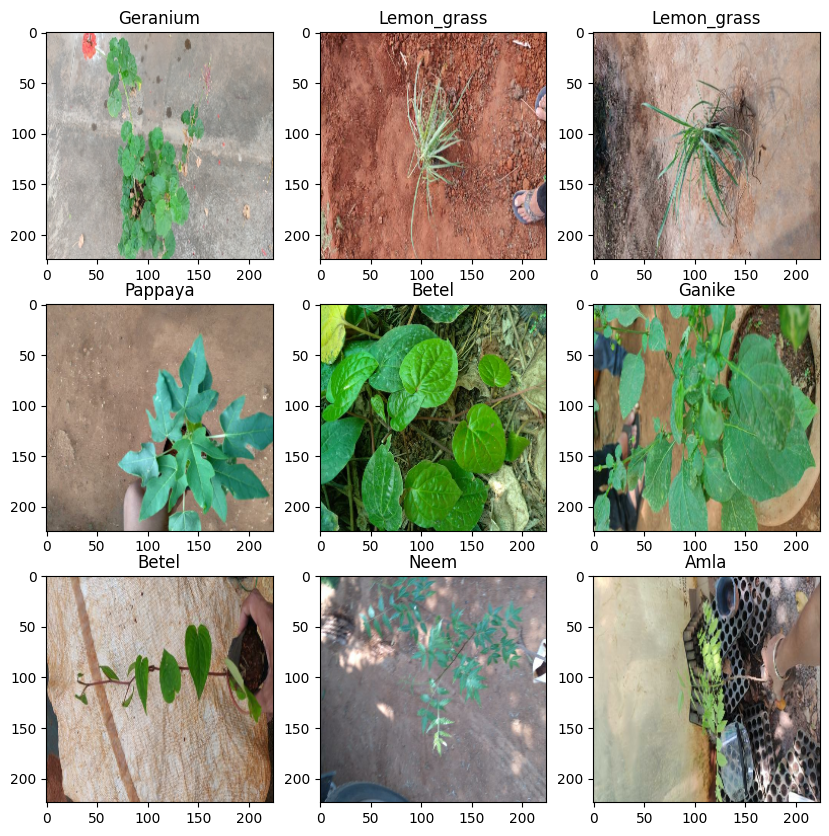

In [22]:
plt.figure(figsize = (10,10))
for images,labels in ds_train.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("on")

In [23]:
# Initialize an empty list to store images
images_list = []

# Initialize an empty NumPy array for labels
labels_array = np.array([])

# Iterate through the dataset
for image_batch, label_batch in ds_train:
    # Append the image batch to the images list
    images_list.append(image_batch.numpy())

    # Concatenate the label batch to the existing labels_array
    labels_array = np.concatenate([labels_array, label_batch.numpy()], axis=0)

# Concatenate the list of image batches into a NumPy array
images_array = np.concatenate(images_list, axis=0)

# Now, 'images_array' contains all the images in a 4D NumPy array, and 'labels_array' contains all the labels as a NumPy array


In [24]:
images_array.shape

(3567, 224, 224, 3)

In [25]:
labels_array

array([ 9., 38., 36., ...,  2., 11., 15.])

In [26]:
images_array[0]

array([[[176.3579  , 163.3579  , 154.3579  ],
        [189.2897  , 175.77184 , 166.77184 ],
        [191.68211 , 177.68211 , 168.68211 ],
        ...,
        [107.89546 , 115.10982 , 125.716995],
        [ 32.85742 ,  41.821777,  53.303955],
        [ 39.377254,  49.377254,  61.377254]],

       [[201.57909 , 188.57909 , 179.57909 ],
        [193.68758 , 180.16972 , 171.16972 ],
        [197.29324 , 183.29324 , 174.29324 ],
        ...,
        [ 98.69673 , 105.91109 , 116.518265],
        [ 32.66692 ,  42.040447,  53.31804 ],
        [ 41.188335,  51.97851 ,  63.97851 ]],

       [[196.52249 , 183.52249 , 174.52249 ],
        [203.39545 , 189.8776  , 180.8776  ],
        [198.88405 , 184.88405 , 175.88405 ],
        ...,
        [ 86.924416,  94.13877 , 104.74595 ],
        [ 32.739693,  42.739693,  53.70405 ],
        [ 40.428223,  52.428223,  64.42822 ]],

       ...,

       [[189.42967 , 181.42967 , 169.74669 ],
        [195.84819 , 188.04855 , 178.2014  ],
        [188.16121 , 1

(-0.5, 223.5, 223.5, -0.5)

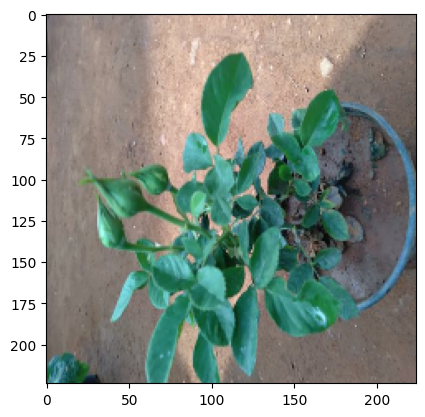

In [27]:
plt.imshow(images_array[2].astype("uint8"))
plt.axis("on")

In [28]:
class_names[int(labels_array[2])]

'Rose'

Training the model

In [29]:
from tensorflow.keras.layers import Input,Dense,Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential

In [30]:
IMAGE_SIZE = [224,224]


In [31]:
vgg = VGG16(input_shape=IMAGE_SIZE +[3] , weights = 'imagenet' , include_top = False)

58889256/58889256 [==============================] - 0s 0us/step


In [32]:
for layer in vgg.layers:
    layer.trainable = False

In [33]:
x = Flatten()(vgg.output)

In [34]:
prediction = Dense(len(class_names) , activation = "softmax")(x)

In [35]:
model = Model(inputs = vgg.input,outputs = prediction)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [36]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer ='adam',
    metrics = ['accuracy']
)

In [ ]:
labels_array

In [39]:
# One-hot encode the labels
labels_one_hot = tf.keras.utils.to_categorical(labels_array, num_classes=40)

In [43]:
r = model.fit(
    images_array,
    labels_one_hot,
    batch_size=16,
    epochs = 5
)

Epoch 1/5
223/223 [==============================] - 1792s 8s/step - loss: 1.2271 - accuracy: 0.9756
Epoch 2/5
223/223 [==============================] - 1774s 8s/step - loss: 1.1359 - accuracy: 0.9731
Epoch 3/5
223/223 [==============================] - 1747s 8s/step - loss: 1.0690 - accuracy: 0.9680
Epoch 4/5
223/223 [==============================] - 1744s 8s/step - loss: 1.1273 - accuracy: 0.9697
Epoch 5/5
223/223 [==============================] - 1792s 8s/step - loss: 1.0211 - accuracy: 0.9815


In [44]:
# Save the entire model, including architecture, weights, and optimizer state
model.save("my_model.h5")  # Provide a filename with a '.h5' extension

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [45]:
# prompt: generate code to test the trainde model take input from user

# Load the saved model
model = tf.keras.models.load_model("my_model.h5")

# Get user input for the image path
image_path = input("Enter the path to the image you want to classify: ")

# Load and preprocess the image
img = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

# Make predictions
predictions = model.predict(img_array)

# Get the predicted class index
predicted_index = np.argmax(predictions[0])

# Print the predicted class name
print("Predicted class:", class_names[predicted_index])


Enter the path to the image you want to classify: /content/Indian Medicinal Leaves Image Datasets/Medicinal plant dataset/Aloevera/339.jpg
1/1 [==============================] - 1s 996ms/step
Predicted class: Aloevera


In [ ]:
pip install pickle

**Testing model;**

In [ ]:
# Iterate through the dataset and print the shape of each element
#for i, (image, label) in enumerate(ds_val):
    #print(f"Element {i + 1} - Image shape: {image.shape}, Label shape: {label.shape}")
    #print(i)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.figure(figsize = (10,10))
for images,labels in ds_val.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("on")

In [ ]:
import numpy as np

In [ ]:
# Initialize empty lists to store images and labels
images_list_v = []
labels_list_v = []

# Iterate through the dataset
for image_batch, label_batch in ds_val:
    # Append the image batch to the images list
    images_list_v.append(image_batch.numpy())

    # Append the label batch to the labels list
    labels_list_v.append(label_batch.numpy())

# Concatenate the list of image batches into a NumPy array
images_array_v = np.concatenate(images_list_v, axis=0)

# Concatenate the list of label batches into a NumPy array
labels_array_v = np.concatenate(labels_list_v, axis=0)

# Now, 'images_array' contains all the images in a 4D NumPy array, and 'labels_array' contains all the corresponding labels as a NumPy array


In [ ]:
images_array_v.shape

In [ ]:
labels_array_v.shape

In [ ]:
# One-hot encode the labels
labels_one_hot_v = tf.keras.utils.to_categorical(labels_array_v, num_classes=40)

In [ ]:
model_new = tf.keras.models.load_model("/kaggle/input/my-model/my_model.h5")

In [ ]:
model_new.summary()

In [ ]:
model_new.evaluate(images_array_v,labels_one_hot_v)

In [ ]:
y_pred = model_new.predict(images_array_v)

In [ ]:
y_pred.shape

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(labels_array_v, y_pred_classes))

In [ ]:
images_array_v[1].shape

In [46]:
# prompt: generate code  to convert /content/1_2023_2.pdf into a csv file, extract id number, college name, location , e.g. E001 | University of Visvesvaraya College of Engineering | Bangalore |

!pip install PyPDF2
import PyPDF2
import re

# Open the PDF file
pdf_file = open('/content/1_2023_2.pdf', 'rb')

# Create a PDF reader object
pdf_reader = PyPDF2.PdfFileReader(pdf_file)

# Get the first page of the PDF
page = pdf_reader.getPage(0)

# Extract the text content from the page
text = page.extractText()

# Close the PDF file
pdf_file.close()

# Extract the ID number, college name, and location using regular expressions
id_pattern = r'ID Number: (\d+)'
college_pattern = r'College Name: (.*)'
location_pattern = r'Location: (.*)'

id_number = re.search(id_pattern, text).group(1)
college_name = re.search(college_pattern, text).group(1)
location = re.search(location_pattern, text).group(1)

# Print the extracted information
print("ID Number:", id_number)
print("College Name:", college_name)
print("Location:", location)

# Create a CSV file with the extracted information
import csv

with open('student_info.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['ID Number', 'College Name', 'Location'])
    writer.writerow([id_number, college_name, location])


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.4/56.4 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 45.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 51.2 MB/s eta 0:00:00


In [ ]:
# prompt: (trial) D:\2023\agriculture\final_project\model\collegerecommendation>python a.py
# Traceback (most recent call last):
#   File "C:\Users\qwert\AppData\Roaming\Python\Python310\site-packages\pandas\core\indexes\base.py", line 3361, in get_loc
#     return self._engine.get_loc(casted_key)
#   File "pandas\_libs\index.pyx", line 76, in pandas._libs.index.IndexEngine.get_loc
#   File "pandas\_libs\index.pyx",

import sys
print(sys.executable)
